In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB

In [2]:
data = pd.read_csv('PlayTennis.csv')

In [3]:
data.head(20)

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [4]:
data.columns

Index(['Outlook', 'Temperature', 'Humidity', 'Wind', 'Play Tennis'], dtype='object')

In [5]:
outlook ={
    'Sunny':1,
    'Overcast':2,
    'Rain':3
}
temperature = {
    'Hot':1,
    'Mild':2,
    'Cool':3
}
humdity = {
    'High':1,
    'Normal':2
}
wind = {
    'Strong':1,
    'Weak':2
}
playtennis = {
    'Yes':1,
    'No':0
}

In [6]:
data['Outlook'] = data['Outlook'].map(outlook)
data['Temperature'] = data['Temperature'].map(temperature)
data['Humidity'] = data["Humidity"].map(humdity)
data['Wind'] = data['Wind'].map(wind)
data['Play Tennis'] = data['Play Tennis'].map(playtennis)

In [7]:
data.fillna(0,inplace=True)

In [8]:
data.head(20)

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,1,1,1,2,0
1,1,1,1,1,0
2,2,1,1,2,1
3,3,2,1,2,1
4,3,3,2,2,1
5,3,3,2,1,0
6,2,3,2,1,1
7,1,2,1,2,0
8,1,3,2,2,1
9,3,2,2,2,1


In [9]:
x = data.drop(columns=['Play Tennis'],axis=1)
y = data['Play Tennis']

In [10]:
x.shape,y.shape

((14, 4), (14,))

In [11]:
model = GaussianNB()

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)

In [13]:
model.fit(x_train,y_train)

GaussianNB()

In [14]:
y_pred = model.predict(x_test)

from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))
print(metrics.f1_score(y_test,y_pred))
print(metrics.matthews_corrcoef(y_test,y_pred))

0.5
1.0
0.3333333333333333
0.5
0.3333333333333333


In [15]:
y_all = model.predict(x)

In [16]:
import seaborn as sns 
metrics.confusion_matrix(y,y_all,labels=[1,0])

array([[6, 3],
       [1, 4]], dtype=int64)

[[6 3]
 [1 4]] 




<AxesSubplot:>

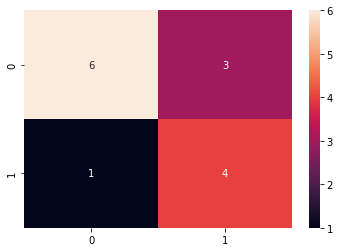

In [17]:
import seaborn as sns 
cm=metrics.confusion_matrix(y,y_all,labels=[1,0])
print(cm,"\n\n")
import seaborn as sns
sns.heatmap(cm,annot=True)